# ML - TME 3 : Introduction à Pytorch


Nicolas Baskiotis (nicolas.baskiotis@sorbonne-universite.fr)  -- MLIA/ISIR, Sorbonne Université


# Préambule

Dans ce TME, vous allez principalement refaire ce que vous avez fait en TME2 mais sous PyTorch, et en remplaçant au fur et à mesure les blocs programmés à la main par les possibilités de PyTorch.

Les lignes suivantes permettent d'importer pytorch et vérifier qu'un GPU est disponible.

In [1]:
import torch
print("La version de torch est : ",torch.__version__)
print("Le calcul GPU est disponible ? ", torch.cuda.is_available())

import numpy as np
import sklearn
import matplotlib.pyplot as plt

La version de torch est :  2.2.0+cu121
Le calcul GPU est disponible ?  False


# Prise en main de Pytorch

Cette partie est un tutoriel pour la prise en main de pytorch. N'hesitez pas à explorer et expérimenter les notions présentées.

## Syntaxe

Le principal objet manipulé sous Pytorch est **torch.Tensor** qui correspond à un tenseur mathématique (généralisation de la notion de matrice en $n$-dimensions), très proche dans l'utilisation de **numpy.array**.   Cet objet est optimisé pour les calculs sur GPU ce qui implique quelques contraintes plus importantes que sous **numpy**. En particulier :
* le type du tenseur manipulé est très important et les conversions ne sont pas automatique (**FloatTensor** de type **torch.float**, **DoubleTensor** de type **torch.double**,  **ByteTensor** de type **torch.byte**, **IntTensor** de type **torch.int**, **LongTensor** de type **torch.long**). Pour un tenseur **t** La conversion se fait très simplement en utilisant les fonctions : **t.double()**, **t.float()**, **t.long()** ...
* la plupart des opérations ont une version *inplace*, c'est-à-dire qui modifie le tenseur plutôt que de renvoyer un nouveau tenseur; elles sont suffixées par **_** (**add_** par exemple).

N'hésitez pas à vous référez à la [documentation officielle](https://pytorch.org/docs/stable/tensors.html) pour la liste exhaustive des opérations.


Les lignes suivantes ont pour objectif à vous faire prendre en main les tenseurs. Completez afin d'effectuer les opérations demandées.

In [2]:
# Création de tenseurs et caractéristiques
liste_1, liste_2 = [1.,2.,3.], [2.,3.,4.]
## Créez un tenseur à partir des listes liste_1 et liste_2
tensor_1=torch.tensor([liste_1,liste_2])
#print(tensor_1)

## Créez un tenseur  tenseur rempli de 1 de taille 2x3x4
tensor_2=torch.ones([2,3,4])
#print(tensor_2)

##  Créez tenseur de zéros de taille 2x3 de type float
tensor_3=torch.zeros([2,3],dtype=float)
#print(tensor_3)
## Créez un tenseur de zéros de taille 2x3 puis remplissez le d'entiers aléatoires entre 10 et 15 (inplace)
tensor_4=torch.zeros([2,3])
tensor_4.random_(10,16)
#print(tensor_4)

##  Créez un tenseur a de taille 2x3 aléatoire suivant une loi normale, et un tenseur b de taille 3x4,
#et un vecteur c de taille 3
tensor_5_a=torch.normal(0,1,size=(2,3))
#print(tensor_5_a)
tensor_5_b=torch.normal(0,1,size=(3,4))
#print(tensor_5_b)
tensor_5_c=torch.normal(0,1,size=(3,))
#print(tensor_5_c)
##  Concatenez les deux tenseurs a de façons à former un  tenseur de taille 6x2
concatenated_tensor = torch.cat((tensor_5_a.t(), tensor_5_a.t()))
#print(concatenated_tensor)

##  Affichez le nombre de lignes, de colonnes  de b
#print(concatenated_tensor.shape)

## Convertissez a en tenseur d'entiers

tensor_a_int=tensor_5_a.to(torch.int)
#print(tensor_a_int)
# Opérations élémentaires sur les tenseurs
##Faites le produit scalaire de c par c
tensor_op1=torch.dot(tensor_5_c,tensor_5_c)
#print(tensor_op1)

## Faites le produit matriciel de a par b
tensor_op2=torch.matmul(tensor_5_a,tensor_5_b)
#print(tensor_op2)

## Calculez le produit matriciel de la transposé de a par a
tensor_op3=torch.matmul(tensor_5_a,tensor_5_a.t())
#print(tensor_op3)

## Trouvez l'index des maximums des colonnes de a
tensor_5_a=torch.normal(0,1,size=(2,3))
#print(tensor_5_a)
#print(torch.argmax(tensor_5_a,axis=0))


## Faites la somme par colonne de b, la somme totale de b
tensor_5_b=torch.normal(0,1,size=(3,4))
#print(tensor_5_b)
#print(torch.sum(tensor_5_b,axis=0))
#print(torch.sum(tensor_5_b))

## Calculez la moyenne selon les colonnes de b, puis la moyenne de tous les éléments
tensor_5_b=torch.normal(0,1,size=(3,4))
#print(tensor_5_b)
#print(torch.mean(tensor_5_b,axis=0))
#print(torch.mean(tensor_5_b))

## Changez la taille de b en 2x6
tensor_5_b=torch.normal(0,1,size=(3,4))
tensor_5_b_reshaped=tensor_5_b.reshape(2,6)
#print(tensor_5_b_reshaped)


Attention ! comme sous numpy, il peut y avoir des pièges !
Vérifier toujours les dimensions !!

In [3]:

a=torch.zeros(5,1)
b=torch.zeros(5)
## la première opération fait un broadcast et le résultat est tenseur à 2 dimensiosn,
## le résultat de la deuxième opération est bien un vecteur
print(a-b,a.t()-b)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) tensor([[0., 0., 0., 0., 0.]])


## Autograd et graphe de calcul
Un élément central de pytorch est le graphe de calcul : lors du calcul d'une variable, l'ensemble des opérations qui ont servies au calcul sont stockées sous la forme d'un graphe acyclique, dit de *calcul*. Les noeuds internes du graphe représentent les opérations, le noeud terminal le résultat et les racines les variables d'entrées. Ce graphe sert en particulier à calculer les dérivées partielles de la sortie par rapport aux variables d'entrées - en utilisant les règles de dérivations chainées des fonctions composées.
Pour cela, toutes les fonctions disponibles dans pytorch comportent un mécanisme, appelé *autograd* (automatique differentiation), qui permet de calculer les dérivées partielles des opérations.

### Différenciation automatique
(De manière simplifiée, pour les détails cf [la documentation](https://pytorch.org/docs/stable/notes/extending.html))

Toute opération sous pytorch hérite de la classe **Function** et doit définir :
* une méthode **forward(\*args)** : passe avant, calcule le résultat de la fonction appliquée aux arguments
* une méthode **backward(\*args)** : passe arrière, calcule les dérivées partielles par rapport aux entrées. Les arguments de  cette méthode correspondent aux valeurs des dérivées suivantes dans le graphe de calcul. En particulier, il y a autant d'arguments à **backward**  que de sorties pour la méthode **forward** (rétro-propagation : on doit connaître les dérivés qui viennent  en aval du calcul) et autant de sorties que d'arguments dans la méthode **forward** (chaque sortie correspond à  une dérivée partielle par rapport à chaque entrée du module). Le calcul se fait sur les valeurs du dernier appel de **forward**.

Par exemple, pour la fonction d'addition  **add(x,y)**, **add.forward(x,y)** renverra **x+y** (l'appel de la fonction est équivalent à l'appel de **forward**) et **add.backward(1)** renverra le couple **(1,1)** (la dérivée par rapport à x, et celle par rapport à y) .



En pratique, ce ne sont pas les méthodes de ces fonctions qui sont utilisées, mais des méthodes équivalentes sur les tenseurs. La méthode **backward** d'un tenseur permet de rétro-propager le calcul du gradient sur toutes les variables qui ont servies à son calcul.

La valeur du gradient pour chaque dérivée partielle se trouve dans l'attribut **grad** de la variable concernée.

Comme c'est un mécanisme lourd, l'autograd n'est pas activé par défaut pour une variable. Afin de l'activer, il faut mettre le flag **requires_grad** de cette variable à vrai. Dès lors, tout calcul qui utilise cette variable sera enregistré dans le graphe de calcul et le gradient sera disponible.


Exemple :

In [4]:
a = torch.tensor(1.)
# Par défaut, requires_grad est à False
print("Graphe de calcul ? ",a.requires_grad)
# On peut demander à ce que le graphe de calcul soit retenu
a.requires_grad = True
# Ou lors de la création du tenseur directement
b = torch.tensor(2.,requires_grad=True)
z = 2*a + b
# Calcul des dérivées partielles par rapport à z
z.backward()
a_grad=a.grad
print("Dérivée de z/a : ", a_grad.item()," z/b :", b.grad.item())
z=5*a-2*b
a_grad.zero_()
z.backward()
print("Dérivée de z/a : ", a_grad.item()," z/b :", b.grad.zero_().item())
# Si on a oublié de demander le graphe de calcul :
a, b = torch.tensor(1.),torch.tensor(2.)
z = 2*a+b
try:
  z.backward()
except Exception as e:
  print("Erreur : ", e)

Graphe de calcul ?  False
Dérivée de z/a :  2.0  z/b : 1.0
Dérivée de z/a :  5.0  z/b : 0.0
Erreur :  element 0 of tensors does not require grad and does not have a grad_fn


### <span class="alert-success">     Exercice :  Utilisation de backward     </div>
* Implémentez (en une ligne) la fonction de coût aux moindres carrés $MSE(\hat{y},y)=\frac{1}{2N} \sum_{i=1}^N\|\hat{y_i}-y_i\|^2$ où $\hat{y},y$ sont deux matrices de taille $N\times d$, et $y_i,\hat{y_i}$ les $i$-èmes vecteurs lignes des matrices.

Vérifiez bien en début de code que $\hat{y}$ et $y$ sont des matrices et non pas des vecteurs, pour ne pas avoir d'erreur lors du broadcasting.

* Engendrez **y,yhat** deux matrices aléatoires de taille $(1,5)$.
* Calculez **MSE(y,yhat)** et l'afficher
* Calculez à la main le gradient de **MSE** par rapport à **y**, **yhat**
* Calculez grâce à pytorch le gradient de **MSE** par rapport à **y** et **yhat** et vérifier le résultat. Observez la dimension de sortie, est-elle bien compatible avec la taille de **y** et **yhat** ?
* Appelez une deuxième fois **MSE** sur les mêmes vecteurs et la méthode **backward**. Qu'observez vous pour le gradient ? Comment l'expliquez vous ?

In [5]:
def MSE(y,y_hat):
    #print(y.size())
    n=len(y)
    norm=torch.linalg.norm(y-y_hat)

    return norm/(2*n)

y=torch.rand(1,5)
print(y)
y_hat=torch.rand(1,5)
print(y_hat)
y.requires_grad=True
y_hat.requires_grad=True
mse=MSE(y,y_hat)
print(mse)
mse.backward()
print("Y derive partielle",y.grad.tolist())
print("Y_hat derivee partielle",y_hat.grad.tolist())

tensor([[0.2750, 0.2616, 0.7931, 0.6965, 0.0520]])
tensor([[0.7875, 0.8702, 0.0545, 0.6153, 0.6107]])
tensor(0.6119, grad_fn=<DivBackward0>)
Y derive partielle [[-0.20941734313964844, -0.24869222939014435, 0.3017883598804474, 0.03316626325249672, -0.22829870879650116]]
Y_hat derivee partielle [[0.20941734313964844, 0.24869222939014435, -0.3017883598804474, -0.03316626325249672, 0.22829870879650116]]


La derivé partielle de Y est égal à l'inverse de Y_hat.La valeur de dérive est la diff entre  Y et Y_hat, donc on peut utiliser cette fonction pour obtenir une approximation de la dérivée partielle de Y en utilisant les données de Y et Y_hat.


### <span class="alert-success"> Exercice :   Régression linéaire en pytorch </span>

* Définissez la fonction **flineaire(x,w,b)** fonction linéaire qui calcule $f(x,w,b)=x.w^t+b$  avec $x\in \mathbb{R}^{{n\times d}},~w\in\mathbb{R}^{1,d}, b\in \mathbb{R}$
* Ecrivez le code de **descente_gradient(datax,datay,loss, eps, epochs)** pour réaliser une descente de gradient sur les données **datax, datay** avec le coût **loss**, un pas de gradient **eps** et un nombre d'itérations **epochs**. Elle doit renvoyer les paramètre **w** et **b** optimaux : $$w^∗,b^∗=argmin_{w,b}\frac{1}{N} \sum_{i=1}^N loss(f(x^i,w,b),y^i)$$

Pour tester votre code, utilisez soit les données simulées du TME2, soit le jeu de données très classique *Boston*, le prix des loyers à Boston en fonction de caractéristiques socio-économiques des quartiers. Le code ci-dessous permet de les charger.

* Visualisez la courbe d'erreur en fonction du nombre d'itérations.

In [6]:

## Chargement des données Boston et transformation en tensor.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(data_home="./data/") ## chargement des données
housing_x = torch.tensor(housing['data'],dtype=torch.float) # penser à typer les données pour éliminer les incertitudes
housing_y = torch.tensor(housing['target'],dtype=torch.float)
print("Nombre d'exemples : ",housing_x.size(0), "Dimension : ",housing_x.size(1))
print("Nom des attributs : ", ", ".join(housing['feature_names']))

print(housing_x[:5])

print("Nombre d'exemples : ",housing_x.size(0), "Dimension : ",housing_x.size(1))
print("Nom des attributs : ", ", ".join(housing['feature_names']))

# On centre norme les données, sinon... Testez pour voir !
housing_x = 2*(housing_x-housing_x.min(0)[0])/(housing_x.max(0)[0]-housing_x.min(0)[0])-1
housing_y = 2*(housing_y-housing_y.min(0)[0])/(housing_y.max(0)[0]-housing_y.min(0)[0])-1
print(housing_x.max(),housing_x.min(),housing_y.max(),housing_y.min())

Nombre d'exemples :  20640 Dimension :  8
Nom des attributs :  MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
tensor([[ 8.3252e+00,  4.1000e+01,  6.9841e+00,  1.0238e+00,  3.2200e+02,
          2.5556e+00,  3.7880e+01, -1.2223e+02],
        [ 8.3014e+00,  2.1000e+01,  6.2381e+00,  9.7188e-01,  2.4010e+03,
          2.1098e+00,  3.7860e+01, -1.2222e+02],
        [ 7.2574e+00,  5.2000e+01,  8.2881e+00,  1.0734e+00,  4.9600e+02,
          2.8023e+00,  3.7850e+01, -1.2224e+02],
        [ 5.6431e+00,  5.2000e+01,  5.8174e+00,  1.0731e+00,  5.5800e+02,
          2.5479e+00,  3.7850e+01, -1.2225e+02],
        [ 3.8462e+00,  5.2000e+01,  6.2819e+00,  1.0811e+00,  5.6500e+02,
          2.1815e+00,  3.7850e+01, -1.2225e+02]])
Nombre d'exemples :  20640 Dimension :  8
Nom des attributs :  MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
tensor(1.) tensor(-1.) tensor(1.) tensor(-1.)


In [7]:
def flineaire(x,w,b):
    return torch.matmul(x,w.t())+b

In [8]:
def descente_gradient(datax, datay, loss, eps, epochs):
    w = torch.rand((1,datax.shape[1]), requires_grad=True)
    b = torch.rand(1, requires_grad=True)
    losses = []
    for e in range(epochs):
        yhat = flineaire(datax,w,b)
        l = loss(yhat, datay)
        losses.append(l.item())
        l.backward()
        w.data = w.data - eps*w.grad
        b.data = b.data - eps*b.grad
        w.grad.zero_()
        b.grad.zero_()
    return w, b, losses

In [13]:
w_opti,b_opti,liste_erreur=descente_gradient(housing_x,housing_y,MSE,0.1,50)
#w = torch.rand((1,housing_x.shape[1]), requires_grad=True)
#b = torch.rand(1, requires_grad=True)
#yhat=flineaire(housing_x,w,b)
#print(MSE(yhat,housing_y))

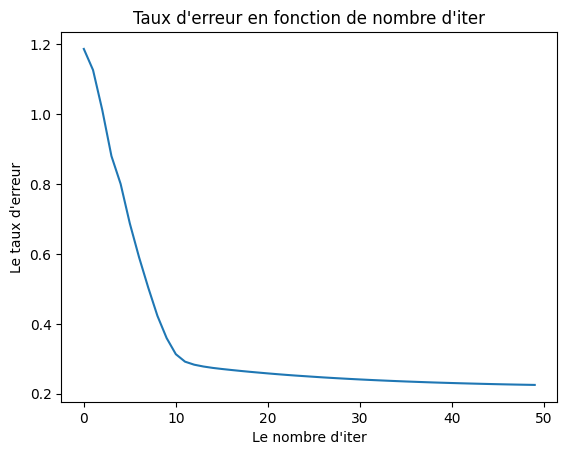

In [14]:
#print(liste_erreur)

def plot_loss(list_erreur):
    list_i=[i for i in range(len(list_erreur))]
    plt.plot(list_i, list_erreur)
    plt.xlabel("Le nombre d'iter")
    plt.ylabel("Le taux d'erreur")
    plt.title("Taux d'erreur en fonction de nombre d'iter")
    plt.show()

plot_loss(liste_erreur)


## Optimiseur
Pytorch inclut une classe très utile pour la descente de gradient, [torch.optim](https://pytorch.org/docs/stable/optim.html), qui permet :
* d'économiser quelques lignes de codes
* d'automatiser la mise-à-jour des paramètres
* d'abstraire le type de descente de gradient utilisé (sgd,adam, rmsprop, ...)

Une liste de paramètres à optimiser est passée à l'optimiseur lors de l'initialisation. La méthode **zero_grad()** permet de remettre le gradient à zéro et la méthode **step()** permet de faire une mise-à-jour des paramètres.

Un exemple de code  utilisant l'optimiseur est donné ci-dessous. 

Ré-implémentez la descente de gradient en utilisant un optimiseur. 

L'optimiseur le plus utilisé  est **Adam** qui permet une pas adaptatif en fonction de l'historique. Sur ce problème simple vous ne verrez pas de différence, vous pourrez comparer par la suite **SGD** et **Adam**.


In [12]:
w = torch.randn(100,dtype=torch.float,requires_grad=True)
b = torch.randn(1,dtype=torch.float,requires_grad=True)
print("W init : ",w)
## on optimise selon w et b.  lr est le pas du gradient
optim = torch.optim.Adam(params=[w,b],lr=1e-3)
auhasard = (w.dot(w)+b)
#Mise à zéro du gradient
optim.zero_grad()
# Calcul du gradient
auhasard.backward()
print("gradient : ",w.grad)
#Mise à jour des paramètres
optim.step()
print("w corrigé : ",w)
#Mise à zéro du gradient
optim.zero_grad()
print(w.grad)

W init :  tensor([ 1.2191, -0.8335, -0.3771, -0.4172, -2.5413,  1.9027,  2.0556, -1.0787,
         1.9545,  0.5517, -1.3243, -0.7938, -0.6193,  1.2500,  0.3397,  0.7317,
         0.6692, -1.2521,  0.1319, -1.2615, -0.4854,  3.1033, -0.9790,  0.4529,
        -1.1298,  0.2787,  0.8150, -0.8331,  0.2887,  0.4836, -1.1031, -0.1386,
         1.3198,  0.1629,  2.0648,  1.1320,  1.1275,  0.0097, -0.8588, -0.2515,
         1.1378,  0.2290, -0.8099, -0.2420,  0.4881,  1.0140,  0.9136,  2.0883,
         1.2352, -1.3352, -0.2584, -0.5380,  0.4404,  0.1370,  0.7786,  0.1479,
        -0.7567, -0.5934,  0.7389, -0.0059,  0.0501, -0.0699,  2.3412,  1.0473,
         0.6430, -0.2149, -1.0464, -0.5456,  2.6090,  0.7417, -0.3685,  0.0557,
         1.6844, -0.1354, -0.2044, -2.2503,  1.4002,  0.1946, -0.4969,  0.1051,
         0.2053, -0.5957, -0.3190,  0.2076,  0.1193,  1.1624, -0.0754,  0.7662,
         0.0436, -1.8016, -0.1685, -0.4586, -0.5893,  0.2583, -0.7461,  0.6087,
        -0.7692,  0.3738,  0.1


Ré-implémentez la fonction de descente de gradient en utilisant un optimiseur.

L'optimiseur le plus utilisé  est **Adam** qui permet une pas adaptatif en fonction de l'historique. Sur ce problème simple vous ne verrez pas de différence, vous pourrez comparer par la suite **SGD** et **Adam**.


In [15]:
w = torch.randn(100,dtype=torch.float,requires_grad=True)
b = torch.randn(1,dtype=torch.float,requires_grad=True)
#print("W init : ",w)
## on optimise selon w et b.  lr est le pas du gradient
optim = torch.optim.SGD(params=[w,b],lr=1e-3)
auhasard = (w.dot(w)+b)
#Mise à zéro du gradient
optim.zero_grad()
# Calcul du gradient
auhasard.backward()
#print("gradient : ",w.grad)
#Mise à jour des paramètres
optim.step()
#print("w corrigé : ",w)
#Mise à zéro du gradient
optim.zero_grad()
#print(w.grad)

In [17]:
def descente_gradient_optimiseur(datax, datay, loss, eps, epochs):
    w = torch.rand((1,datax.shape[1]), requires_grad=True)
    b = torch.rand(1, requires_grad=True)
    optim = torch.optim.SGD(params=[w,b],lr=eps)
    losses = []
    for e in range(epochs):
        yhat = flineaire(datax,w,b)
        l = loss(yhat, datay)
        losses.append(l.item())
        l.backward()
        optim.step()
        w.data = w.data - eps*w.grad
        b.data = b.data - eps*b.grad
        optim.zero_grad()
    return w, b, losses

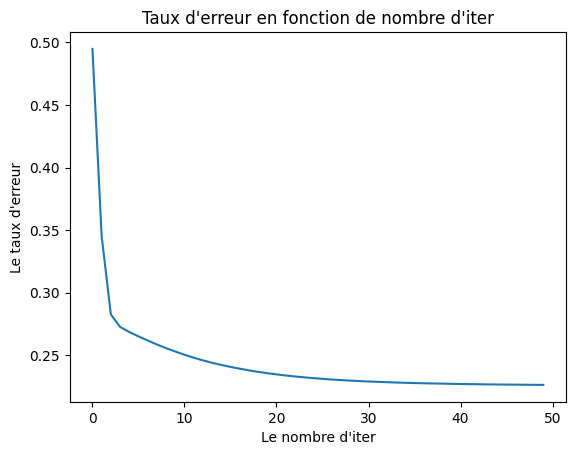

In [18]:
w,b,loss=descente_gradient_optimiseur(housing_x,housing_y,MSE,0.1,50)
plot_loss(loss)


## DataLoader
Le <a href=https://pytorch.org/docs/stable/data.html>**DataLoader**</a> et la classe associée <a href=https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset> **Dataset**</a>  permettent en particulier de :
* charger des données
* pré-processer les données
* de gérer les mini-batchs (sous-ensembles sur lequel on effectue une descente de gradient).

La classe **Dataset** est une classe abstraite qui nécessite l'implémentation que d'une seule méthode, ```__getitem__(self,index)``` : elle renvoie le i-ème objet du jeu de données (généralement un couple *(exemple,label)*.

La classe **TensorDataset** est l'instanciation la plus courante d'un **Dataset**, elle permet de créer un objet **Dataset** à partir d'une liste de tenseurs qui renvoie pour un index $i$ donné le tuple contenant les $i$-èmes ligne de chaque tenseur.

La classe **DataLoader** permet essentiellement de randomiser et de constituer des mini-batchs de façon simple à partir d'une instance de **Dataset**. Chaque mini-batch est constitué d'exemples tirés aléatoirement dans le **Dataset** passé en paramètre et mis bout à bout dans des tenseurs. La méthode ```collate_fn(*args)``` est utilisée pour cela (nous ne l'utiliserons pas pour l'instant). C'est ce générateur qui est généralement parcouru lors de l'apprentissage à chaque itération d'optimisation.

Voici un exemple de code pour utiliser le DataLoader :


In [38]:
from torch.utils.data import DataLoader,TensorDataset, Dataset

## Création d'un dataset à partir des deux tenseurs d'exemples et de labels
train_data = TensorDataset(housing_x,housing_y)

## On peut indexer et connaitre la longueur d'un dataset
#print(len(train_data),train_data[5])

## Création d'un DataLoader
## tailles de mini-batch de 16, shuffle=True permet de mélanger les exemples
# loader est un itérateur sur les mini-batchs des données
loader = DataLoader(train_data, batch_size=32,shuffle=True )

#Premier batch (aléatoire) du dataloader :
#print(len(iter(loader)),next(iter(loader)))
for x,y in loader:
    #print(x,y)
    break



Modifiez votre code pour utiliser un Dataloader : **descente_gradient(loader, loss, eps, epochs) **.

Oubliez pas qu'une époque correspond à la prise en compte de tous les exemples une fois. Le coût n'est généralement enregistré qu'à la fin d'une époque, cumulé sur tous les batchs. Vous pouvez utiliser la fonction **item()** d'un tenseur pour avoir accès au scalaire sans garder de trace du graphe de calcul.

Testez et observez les différences en fonction de la taille des mini-batchs. Est-ce plus rapide ou plus lent que la version batch ? pourquoi ?

In [39]:
def descente_gradient_loader(loader, loss, eps, epochs):
    datax,datay=next(iter(loader))
    w = torch.rand((1,datax.shape[1]), requires_grad=True)
    b = torch.rand(1, requires_grad=True)
    optim = torch.optim.SGD(params=[w,b],lr=eps)
    losses = []
    for e in range(epochs):
        yhat = flineaire(datax,w,b)
        l = loss(yhat, datay)
        losses.append(l.item())
        l.backward()
        optim.step()
        w.data = w.data - eps*w.grad
        b.data = b.data - eps*b.grad
        optim.zero_grad()
    return w, b, losses

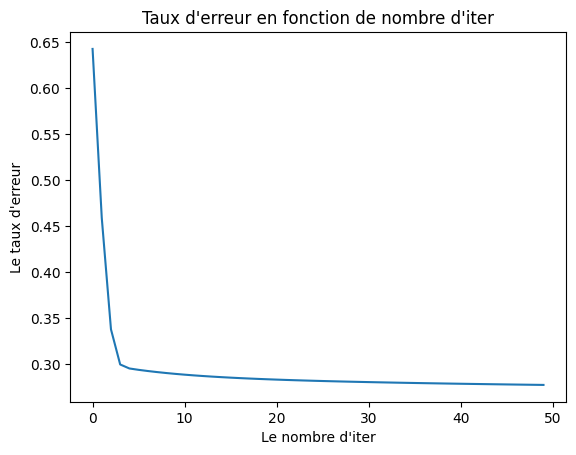

In [40]:
w,b,loss=descente_gradient_loader(loader,MSE,0.1,50)
plot_loss(loss)


## TensorBoard

Durant l'apprentissage de vos modèles, il est agréable de visualiser de quelle manière évolue le coût, la précision sur l'ensemble de validation ainsi que d'autres éléments. TensorFlow dispose d'un outil très apprécié, le TensorBoard, qui permet de gérer très facilement de tels affichages. On retrouve tensorboard dans **Pytorch** dans ```torch.utils.ensorboard``` qui permet de faire le pont de pytorch vers cet outil.

Le principe est le suivant :
* tensorboard fait tourner en fait un serveur web local qui va lire les fichiers de log dans un répertoire local. L'affichage se fait dans votre navigateur à partir d'un lien fourni lors du lancement de tensorboard.
* Les éléments que vous souhaitez visualiser (scalaire, graphes, distributions, histogrammes) sont écrits dans le fichier de log à partir d'un objet **SummaryWriter** .
* la méthode ```add_scalar(tag, valeur, global_step)``` permet de logger une valeur à un step donné, ```add_scalar(tag, tag_scalar_dic, global_step)``` un ensemble de valeurs par l'intermédiaire du dictionnaire ```tag_scalar_dic``` (un regroupement des scalaires est fait en fonction du tag passé, chaque sous-tag séparé par un **/**).

Il existe d'autres méthodes ```add_XXX``` pour visualiser par exemple des images, des histogrammes (cf <a href=https://pytorch.org/docs/stable/tensorboard.html>la doc </a>).

Le code suivant illustre une manière de l'utiliser.
Pour information, il est bien plus agréable de l'utiliser en dehors d'un notebook que à l'intérieur. 

In [41]:
#Spécial notebook, les commandes suivantes permettent de lancer tensorboard
# En dehors du notebook, il faut le lancer à la main dans le shell :
# tensorboard --logdir logs
TB_PATH = "/tmp/logs/module1"
import os
os.makedirs(TB_PATH,exist_ok=True)
%load_ext tensorboard
%tensorboard --logdir {TB_PATH}
from torch.utils.tensorboard import SummaryWriter

# Spécial notebook : pour avoir les courbes qui s'affichent dans le notebook,
# sinon aller à l'adresse web local indiquée lors du lancement de tensorboard
from tensorboard import notebook
notebook.display()
# Où seront stockés les logs.
summary = SummaryWriter(f"{TB_PATH}/test")

mseloss = torch.nn.MSELoss()
for e in range(1000):
    summary.add_scalar("loss/train",torch.randn(1,1).item(),e)
    summary.add_scalar("loss/test",torch.randn(1,1).item(),e)
  

Selecting TensorBoard with logdir /tmp/logs/module1 (started 0:00:00 ago; port 6006, pid 17856).


Intégrez Tensorboard à votre code et testez le.